In [1]:
#import required libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import libraries for reading stock data from yahoo
from pandas_datareader import data

In [4]:
#import for time stamp
from datetime import datetime

In [5]:
#define stocks to be used for data analysis
stock_list=['AAPL','AMZN','MSFT','GOOG']
#define end and start date for historical data
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
# for traversing through the stock list and setting up as a dataframe
for stock_symbol in stock_list:
    #set stock ticker indataframe-Reading from yahoo finance
    globals()[stock_symbol]=data.DataReader(stock_symbol,'yahoo', start,end)

In [6]:
#view summary stats of apple stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,151.429921,152.406191,150.471786,151.541666,150.534479,2.709359e+07
std,14.372696,14.469046,14.136442,14.284385,14.847112,1.126767e+07
min,117.949997,119.300003,117.940002,118.989998,117.106812,1.402670e+07
25%,142.930000,143.785004,142.112499,142.657497,141.437744,2.034908e+07
50%,153.400002,153.985001,152.165001,153.159996,151.974723,2.438550e+07
75%,160.117501,161.179996,158.937504,160.177502,159.519047,2.951715e+07
max,175.110001,177.199997,174.860001,176.419998,176.419998,1.119850e+08


In [7]:
#view general info of apple stock
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-01-09 to 2018-01-08
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [8]:
#create a pandas dataframe for aaple stock
df_APPL=pd.DataFrame(AAPL['Adj Close'])

In [9]:
#view first five records
df_APPL.head()

,Adj Close
Date,
2017-01-09,117.106812
2017-01-10,117.224907
2017-01-11,117.854782
2017-01-12,117.362694
2017-01-13,117.156021


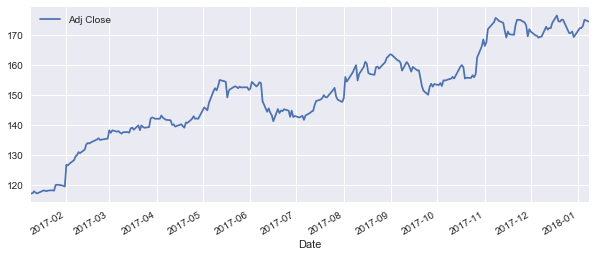

In [10]:
#view historical closing price data
df_APPL.plot(legend=True,figsize=(10,4))

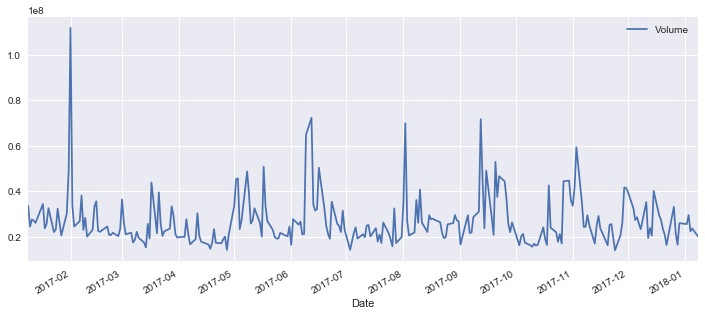

In [11]:
#volume of stock traded each day
AAPL['Volume'].plot(legend=True,figsize=(12,5))

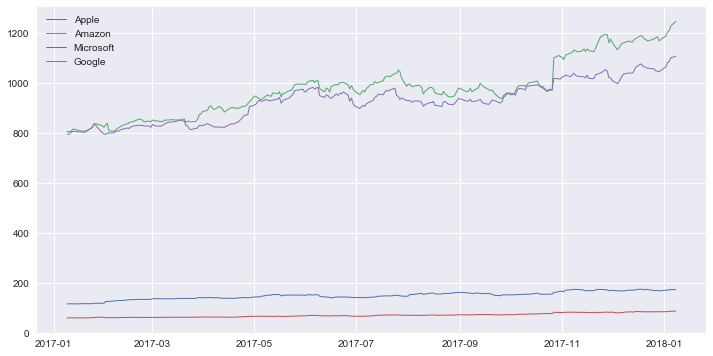

In [12]:
#plot all stock for adj close for entire year
plt.figure(figsize=(12,6))
plt.plot(AAPL['Adj Close'],label='Apple',linewidth=1)
plt.plot(AMZN['Adj Close'],label='Amazon',linewidth=1)
plt.plot(MSFT['Adj Close'],label='Microsoft',linewidth=1)
plt.plot(GOOG['Adj Close'],label='Google',linewidth=1)
#set legend
plt.legend()

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\transforms.py:661: RuntimeWarning: invalid value encountered in absolute
  inside = ((abs(dx0 + dx1) + abs(dy0 + dy1)) == 0)


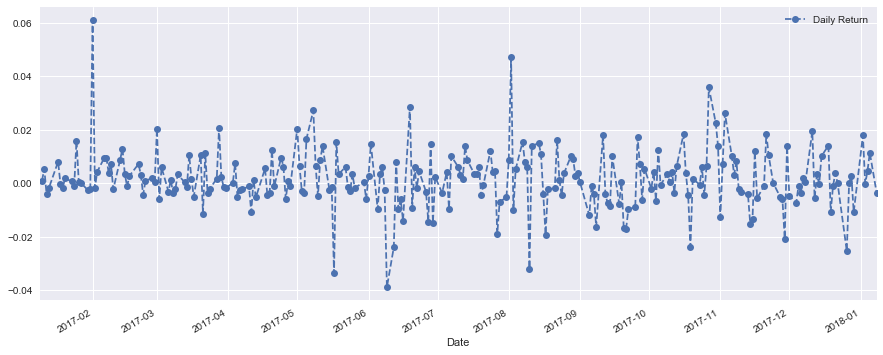

In [13]:
# compute percentage change using built in pct_change method for the apple stock
AAPL['Daily Return']= AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6),legend=True,linestyle='--',marker='o')

In [14]:
#fetch closing prices for stock symbols and put them into dataframe
closing_price_stock=data.DataReader(['AAPL','AMZN','MSFT','GOOG'],'yahoo',start,end)['Adj Close']

In [15]:
closing_price_stock.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-08,174.350006,1246.869995,1106.939941,88.279999
2018-01-05,175.000000,1229.140015,1102.229980,88.190002
2018-01-04,173.029999,1209.589966,1086.400024,87.110001
2018-01-03,172.229996,1204.199951,1082.479980,86.349998
2018-01-02,172.259995,1189.010010,1065.000000,85.949997


In [16]:
# compute percentage change using built in pct channge method for stocks
stocks_return=closing_price_stock.pct_change()

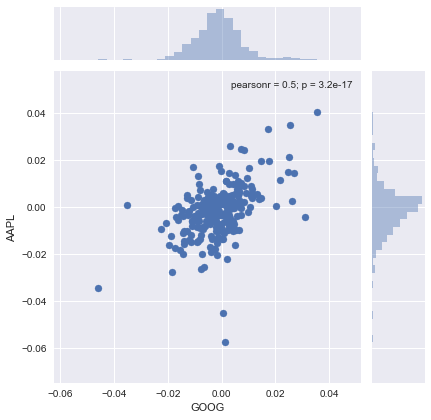

In [17]:
#compare daily return go apple and google
sns.jointplot('GOOG','AAPL',stocks_return,kind='scatter')

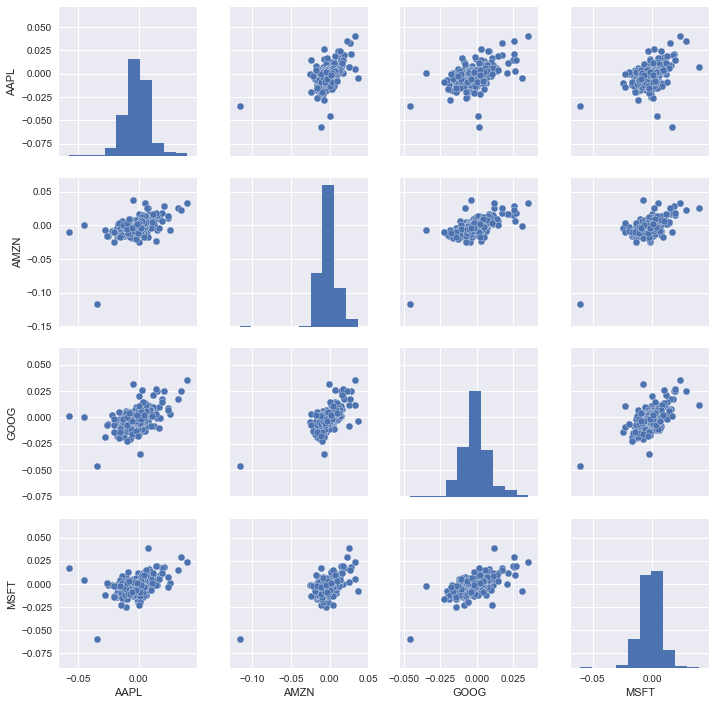

In [18]:
#use pair plot for complete visual analysis and comparision of all stocks
sns.pairplot(stocks_return.dropna())

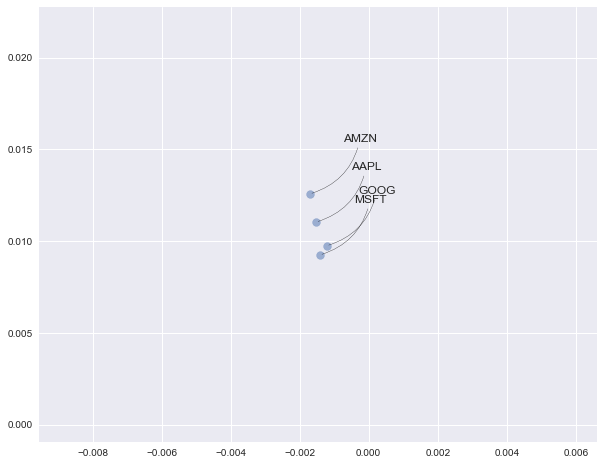

In [19]:
# compare the expected returns with the standard deviation of daily returns
returns=stocks_return.dropna()
area=np.pi*20
plt.figure(figsize=(10,8))
plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=area)
#set the plot axis titles
plt.xlabel=('Expected Returns')
plt.ylabel=('Risk')
#set the graph properties
for label,x,y in zip(returns.columns,returns.mean(),returns.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='center',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3'))    